<div style="width:90%; text-align:center; border-width: 0px; display:block; margin-left:auto; margin-right:auto;">
<div class="alert alert-block alert-success" style="text-align:center; color:navy;">
<img src="https://raw.githubusercontent.com/bgeneto/MCA/main/imagens/logo_unb.png" style="width: 200px; opacity:0.85;">
<h1>Universidade de Brasília</h1>
<h2>Instituto de Física</h2>
<hr style="width:44%;border:1px solid navy;">
<h3>Métodos Computacionais A (MCA)</h3> 
<h4>Prof. Bernhard Enders</h4>
<hr style="width:44%;border:1px solid navy;">
</div>
</div>

# **➲ Interpolação**

## ➥ O que é interpolar?
---

Em matemática, denomina-se interpolação o método que permite construir um novo conjunto de dados a partir de um conjunto discreto de dados previamente conhecidos. Em outras palavras, é possível que conheçamos uma função $f: [a, b] \rightarrow \mathbb{R}$ em alguns pontos apenas. Isso pode ocorrer, por exemplo, porque o custo para computá-la é muito elevado — e.g. quando a função é resultado de uma sequência longa de operações computacionais envolvendo simulações de fenômenos complexos — ou quando a função é obtida experimentalmente (duração limitada).

Em pesquisa científica, geralmente dispomos de dados pontuais obtidos a partir de uma amostragem/experimento. Tal conjunto de dados pontuais (também denominado conjunto discreto) não possui continuidade e, muita vez, não atende a todo o espectro/domínio que pretendemos investigar.

Interpolar significa construir uma função que se "encaixe" aproximadamente em nossos dados experimentais (pontos discretos), conferindo-lhes, então, a continuidade e o alcance desejados.

Infelizmente esse problema é muito vago. De fato considere o problema de
aproximar a função seno conhecendo os seus valores nos ângulos notáveis.

| $x$       | $0$ | $\frac{\pi}{4}$      | $\frac{\pi}{3}$      | $\frac{\pi}{2}$ |
| --------- | --- | -------------------- | -------------------- | --------------- |
| $\sin(x)$ | $0$ | $\frac{\sqrt{2}}{2}$ | $\frac{\sqrt{3}}{2}$ | $1$             |

Veja o gráfico da função abaixo com os pontos tabelados destacados.

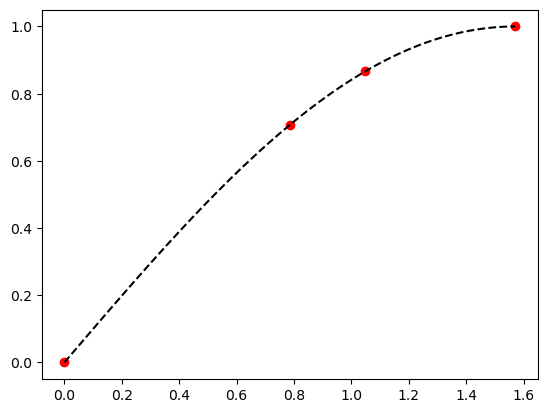

In [46]:
import numpy as np
import matplotlib.pyplot as plt

angulos = [0, np.pi/4, np.pi/3, np.pi/2]
x = np.linspace(0, np.pi/2, 100)

plt.scatter(angulos, np.sin(angulos), color='red', label='')
plt.plot(x, np.sin(x), linestyle='dashed', color='black')

plt.show()

Nesse caso é claro que, além da função seno, há múltiplas (infinitas) funções, contínuas ou não, que passam pelos pontos vermelhos. 

Vejamos outro exemplo:

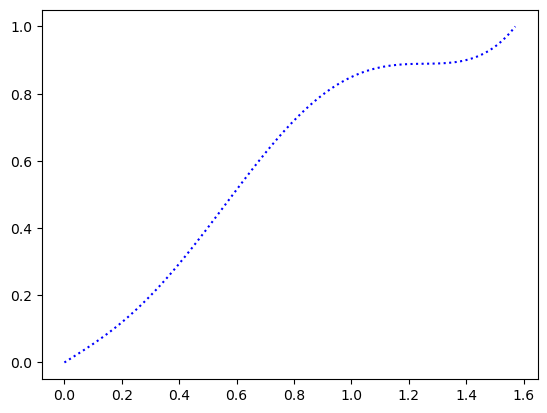

In [47]:
from numpy import sin, cos, pi
def f(x):
    π = pi
    num1 = sin(π/4)*cos(x - π/2)*cos(x + π/6)*cos(x)
    den1 = cos(π/4 - π/2)*cos(π/4 + π/6)*cos(π/4)
    num2 = sin(π/3)*cos(x - π/2)*cos(x + π/4)*cos(x)
    den2 = cos(π/3 - π/2)*cos(π/3 + π/4)*cos(π/3)
    num3 = sin(π/2)*x*(x - π/4)*(x - π/3)
    den3 = π/2*π/4*π/6
    return num1 / den1 + num2 / den2 + num3 / den3


plt.plot(x, f(x), linestyle='dotted', color = 'blue')
plt.show()

Queremos buscar uma função que represente muito bem nossos dados e, além disso, seja "bem comportada", que possua uma expressão relativamente simples, que não possua variações bruscas.

Uma das maneiras de controlar a complexidade das funções que podemos usar na aproximação é definir uma classe de funções de trabalho, que sejam bem conhecidas e possuam boas propriedades. Um das classes de funções bem
comportadas e que são fáceis de calcular são as funções polinomiais. 

## ➥ Interpolação Linear
---

É a forma mais básica (e óbvia) de se interpolar dois pontos (ou vários pontos dois a dois). 

Se os dois pontos conhecidos são dados pelas coordenadas $(x_{0},y_{0})$ e $(x_{1},y_{1})$, o interpolante linear é a linha reta entre esses pontos. Para um valor $x$ no intervalo, o valor $y$ ao longo da linha reta é dado pela solução da equação das inclinações (já que as inclinações devem ser iguais):

$${\displaystyle {\frac {y-y_{0}}{x-x_{0}}}={\frac {y_{1}-y_{0}}{x_{1}-x_{0}}},}$$

Resolver esta equação para $y$, que é o valor desconhecido em $x$, é igual a

$$
{\displaystyle y=y_{0}+(x-x_{0}){\frac {y_{1}-y_{0}}{x_{1}-x_{0}}}={\frac {y_{0}(x_{1}-x)+y_{1}(x-x_{0})}{x_{1}-x_{0}}},}
$$

que é a fórmula para interpolação linear no intervalo ${\displaystyle (x_{0},x_{1})}$. Veremos (mais adiante) que este é exatamente o polinômio interpolador de Lagrange linear que passa pelos dois pontos $(x_{0},y_{0})$ e $(x_{1},y_{1})$.

## ➥ Polinômios de Lagrange
---

Uma maneira clássica de resolver o problema da interpolação polinomial é através dos polinômios de Lagrange. Dado um conjunto de pontos $\{x_j\}_{j=1}^n$ distintos dois a dois, definimos os polinômios de Lagrange como os polinômios de grau $n-1$ que satisfazem

\begin{equation*}
L_k(x_j)=\left\{\begin{array}{rl}
1,& \text{se }k=j\\
0,& \text{se }k\neq j
\end{array}
\right.
\end{equation*}

Assim, o polinômio $p(x)$ de grau $n-1$ que interpola os pontos dados, isto é, $p(x_j)=y_j, j=1,\ldots,n$ é dado por

\begin{equation*}
  p(x)=y_1L_1(x)+y_2L_2(x)+\cdots +y_nL_n(x)=\sum_{k=1}^n y_k L_k(x).
\end{equation*}

Para construir os polinômios de Lagrange, podemos analisar a sua forma fatorada, ou seja:

\begin{equation*} 
L_k(x)=c_k\prod_{\substack{j=1\\j\ne k}}^{n} (x-x_j) 
\end{equation*}

onde o coeficiente $c_k$ é obtido da condição $L_k(x_k)=1$:

\begin{equation*} 
L_k(x_k)=c_k\prod_{\substack{j=1\\j\ne k}}^{n} (x_k-x_j) \Longrightarrow  c_k=\frac{1}{\displaystyle \prod_{\substack{j=1\\j\ne k}}^{n} (x_k-x_j)} 
\end{equation*}

Portanto,
\begin{equation*} 
L_k(x)=\prod_{\substack{j=1\\j\ne k}}^{n} \frac{(x-x_j)}{(x_k-x_j)} 
\end{equation*}


<div class="alert alert-block alert-info">
<b>&#9997; Exemplo:</b> Encontre o polinômio da forma <em>p(x) = a<sub>1</sub> + a<sub>2</sub>x + a<sub>3</sub>x<sup>2</sup> + a<sub>4</sub>x<sup>3</sup></em> que passa pelos pontos (0, 0), (1, 1), (2, 4) e (3, 9).
</div>

Escrevemos:

\begin{align*}
  L_1(x) &= \frac{(x-1)(x-2)(x-3)}{(0-1)(0-2)(0-3)} = -\frac{1}{6}x^3+x^2-\frac{11}{6}x+1 \\
  L_2(x) &= \frac{x(x-2)(x-3)}{1(1-2)(1-3)} = \frac{1}{2}x^3-\frac{5}{2}x^2+3x \\
  L_3(x) &= \frac{x(x-1)(x-3)}{2(2-1)(2-3)} = -\frac{1}{2}x^3+2x^2-\frac{3}{2}x \\
  L_4(x) &= \frac{x(x-1)(x-2)}{3(3-1)(3-2)} = \frac{1}{6}x^3-\frac{1}{2}x^2+\frac{1}{3}x
\end{align*}

Assim, temos:

\begin{equation*}
  P(x)=0\cdot L_1(x)+1\cdot L_2(x)+4\cdot L_3(x)+9\cdot L_4(x)=x^2
\end{equation*}

Vejamos como tudo isso fica representado em Python:

In [48]:
import matplotlib.pyplot as plt
import numpy as np
import numpy.polynomial.polynomial as poly

# pontos
x = [0, 1, 2, 3]
y = [0, 1, 4, 9]

# coeficientes
L1x = [1.0, -11.0 / 6, 1.0, -1.0 / 6]
L2x = [0.0, 3.0, -5.0 / 2, 0.5]
L3x = [0.0, -3.0 / 2, 2.0, -0.5]
L4x = [0.0, 1.0 / 3, -0.5, 1.0 / 6]

# polinômios-base
L1 = poly.Polynomial(L1x)
L2 = poly.Polynomial(L2x)
L3 = poly.Polynomial(L3x)
L4 = poly.Polynomial(L4x)

# polinômio completo de Lagrange
P = 0 * L1 + 1 * L2 + 4 * L3 + 9 * L4

In [49]:
# exibe um dos polinômios com formatação apropriada
from IPython.display import HTML, display

display(L2)

Polynomial([ 0. ,  3. , -2.5,  0.5], domain=[-1,  1], window=[-1,  1], symbol='x')

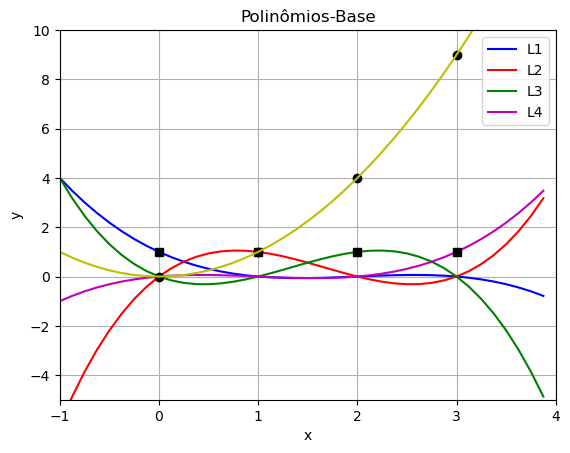

In [50]:
# abscissas
x_new = np.arange(-1.0, 4, 0.125)

# gráfico de cada um dos polinômios
fig = plt.figure()
plt.plot(x_new, L1(x_new), "b", label="L1")
plt.plot(x_new, L2(x_new), "r", label="L2")
plt.plot(x_new, L3(x_new), "g", label="L3")
plt.plot(x_new, L4(x_new), "m", label="L4")
plt.plot(x, np.ones(len(x)), "ks")
plt.plot(x, y, "ko")
plt.plot(x_new, P(x_new), "y")
plt.title("Polinômios-Base")
plt.xlabel("x")
plt.ylabel("y")
plt.axis([-1, 4, -5, 10])
plt.grid()
plt.legend()
plt.show()

Note que se $k = j$, então $L_k(x_j) = 1$.

**➭ Utilizando o NumPy para construir o Polinômio de Lagrange**

Podemos construir o polinômio de Lagrange mais facilmente utilizando a função `lagrange` do NumPy. Para isso, basta passar como argumentos os pontos $(x_j, y_j)$, $j = 1, \ldots, n$.

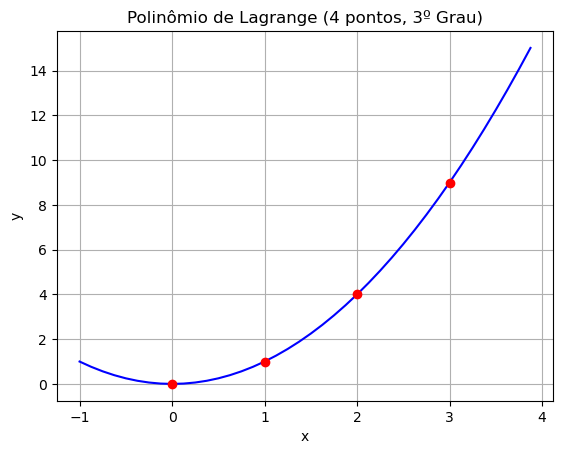

In [51]:
from scipy.interpolate import lagrange

f = lagrange(x, y)
fig = plt.figure()
plt.plot(x_new, f(x_new), "b", x, y, "ro")
plt.title("Polinômio de Lagrange (4 pontos, 3º Grau)")
plt.grid()
plt.xlabel("x")
plt.ylabel("y")
plt.show()

## ➥ Aplicações da Interpolação
---

São muitas as aplicações da Interpolação da Lagrange, vamos citar apenas algumas possibilidades de uso:

- Estimativa de Temperaturas: Suponha que você tem um conjunto de dados com as temperaturas de uma cidade a cada hora do dia. Se você quiser prever a temperatura em um horário específico, mas não tem a leitura exata, pode usar a interpolação com polinômios da Lagrange para estimar o valor da temperatura naquele horário.

- Ajuste de Curvas: A interpolação com polinômios da Lagrange pode ser usada para ajustar uma curva a um conjunto de pontos. Por exemplo, você pode ter um conjunto de dados experimentais que descrevem a relação entre a temperatura e a pressão de um gás em um recipiente. Você pode usar a interpolação com polinômios da Lagrange para encontrar uma função que ajuste esses dados e possa ser usada para prever a pressão em uma determinada temperatura.

- Processamento de Sinais: A interpolação com polinômios da Lagrange é uma técnica comum no processamento de sinais digitais. Por exemplo, se você tem um sinal de áudio com amostras discretas, pode usar a interpolação com polinômios da Lagrange para obter uma representação contínua do sinal.

- Análise de Dados Geofísicos: Na análise de dados geofísicos, como em estudos sísmicos, é comum usar interpolação com polinômios da Lagrange para interpolar dados em locais onde não há medições disponíveis.

- Criação de Gráficos: A interpolação com polinômios da Lagrange pode ser usada para criar gráficos suaves e contínuos a partir de um conjunto de pontos discretos. Por exemplo, você pode ter um conjunto de pontos que representam os dados de uma função matemática, mas deseja visualizar uma representação suave e contínua da função em um gráfico. A interpolação com polinômios da Lagrange pode ser usada para criar um polinômio que represente a função e, em seguida, plotá-la em um gráfico.

## ➥ Melhorando as raízes via interpolação de Lagrange
---

Outro exemplo bastante comum é a possibilidade de obter resultados mais precisos ao tentar obter as raízes provenientes de dados discretos (pontos). Muitas vezes os pontos — obtidos experimentalmente por meio de equipamentos limitados — não possuem resolução (espaçamento) adequado para obtenção precisa das raízes ou zeros. Nesses casos, sempre que possível, podemos fazer uso do procedimento de interpolção. 

Vejamos um exemplo, abaixo temos o seguinte conjunto de dados:

In [52]:
%%writefile dados.csv
-1.285714285714285587e+00,-4.084548104956265746e+00
-9.285714285714286031e-01,-3.873906705539358342e-01
-5.714285714285713969e-01,1.833819241982507453e+00
-2.142857142857141906e-01,2.852405247813411204e+00
1.428571428571427937e-01,2.941690962099125617e+00
5.000000000000000000e-01,2.375000000000000000e+00
8.571428571428572063e-01,1.425655976676384329e+00
1.214285714285714413e+00,3.669825072886299111e-01
1.571428571428571619e+00,-5.276967930029163867e-01
1.928571428571428825e+00,-9.850583090379014806e-01
2.285714285714285587e+00,-7.317784256559782818e-01
2.642857142857143238e+00,5.054664723032118445e-01
3.000000000000000000e+00,3.000000000000000000e+00

Overwriting dados.csv


Vamos ler o arquivo "dados.csv" traçar o gráfico desses dados:

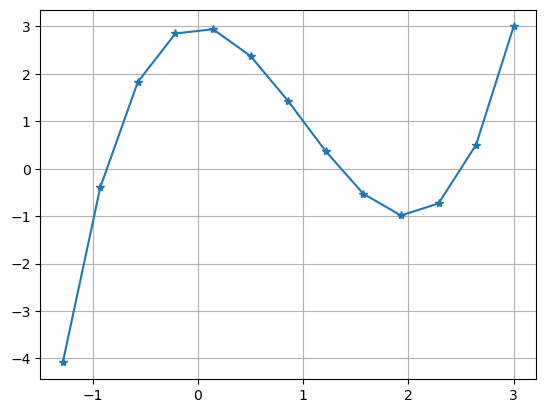

In [53]:
# usamos o numpy para ler o arquivo de dados
dados = np.genfromtxt("dados.csv", delimiter=",")
x = dados[:, 0]
y = dados[:, 1]

# traça o gráfico dos pontos
plt.plot(x, y, "-*")
plt.grid()
plt.show()

Para encontrar as raízes vamos lançar mão da nossa classe `rootFind` desenvolvida na aula anterior. Vamos fazer algumas modificações (criar novos métodos) para deixar nossa classe ainda mais útil. 

In [54]:
class RootFind:
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def cross_indexes(self):
        """
        Retorna os índices de y antes de cada mudança de sinal.
        """
        return np.where(np.diff(np.signbit(self.y)))[0]

    def cross_points(self):
        """
        Retorna o valor do par ordenado (x1, y1) antes de cada mudança de sinal
        seguido do par ordenado (x2, y2) após cada mudança de sinal.
        """
        # quick find all sign changes
        bools = self.y[:-1] * self.y[1:] < 0
        return (self.x[:-1][bools], self.y[:-1][bools]), (
            self.x[1:][bools],
            self.y[1:][bools],
        )

    def brute_force(self):
        """
        Calcula uma aproximação para todas as raízes
        no domínio (implicitamente) fornecido em x.
        """
        (x1, y1), (x2, y2) = self.cross_points()
        return x1 - y1 * (x2 - x1) / (y2 - y1)

    def interpolate(self, npts=4):
        """
        Realiza uma interpolação da Lagrange dado o número de pontos.
        """
        i = self.cross_indexes()
        x = np.column_stack([self.x[i - 1], self.x[i], self.x[i + 1], self.x[i + 2]])
        y = np.column_stack([self.y[i - 1], self.y[i], self.y[i + 1], self.y[i + 2]])
        for i in range(len(x)):
            yield x[i][0], x[i][-1], lagrange(x[i], y[i])

    def lagrange(self):
        """Computa as raízes utilizando a interpolação de Lagrange."""
        for x1, x2, f in self.interpolate():
            yield self.secant(f, x1, x2)

    def secant(self, f, x_0, x_1, y=0, max_iter=200, abs_tol=1e-11):
        assert x_0 != x_1, "Two different initial seeds are required."

        if abs((y_0 := f(x_0) - y)) < abs_tol:
            # found!
            return x_0
        if abs((y_1 := f(x_1) - y)) < abs_tol:
            # found!
            return x_1

        for i in range(max_iter):
            x_2 = x_1 - y_1 * (x_1 - x_0) / (y_1 - y_0)
            if abs((y_2 := f(x_2) - y)) < abs_tol:
                return x_2  # found root within margin
            x_0, x_1 = x_1, x_2
            y_0, y_1 = y_1, y_2
        return x_2

    def steffensen(self, f, x, y=0, max_iter=200, abs_tol=1e-11):
        """Iterative approach of Root-finding with steffensen's method
        Parameters
        ----------
        f: callable, continuous function
        x: float, initial seed
        y: float, target value
        max_iter: int, maximum number of iterations to avoid infinite loop
        abs_tol: float, margin of error in absolute terms
        Returns
        -------
        A float x, where f(x) is within the tolerance of y
        """

        assert x != 0, "Initial seed cannot be zero."

        if abs((y_x := f(x) - y)) < abs_tol:
            # found!
            return x

        for i in range(max_iter):
            g = (f(x + y_x) - y) / y_x - 1
            if g * x == 0:
                return x  # division by zero, stop
            x -= (f(x) - y) / (g * x)
            if abs((y_x := f(x) - y)) < abs_tol:
                return x  # root found
        return x


In [55]:
# encontrando as raízes (por interpolação linear)
rf = RootFind(x, y)
roots = rf.brute_force()
print("As raízes encontradas são: ", roots)

As raízes encontradas são:  [-0.86628384  1.36077975  2.4969493 ]


As raízes exatas desses dados correspondem à solução da equação: $f(x) = x^3 - 3x^2 + 3$, ou seja, valem:

<code>[-0.879385241571817  1.34729635533386  2.53208888623796]</code>

Vamos tentar melhorar nossa aproximação usando a interpolação de Lagrange não-linear, isto é, de grau mais elevado. Para isso, vamos criar um novo método na classe `rootFind`:

In [56]:
print("As novas raízes encontradas são: ")
list(rf.lagrange())


As novas raízes encontradas são: 


[-0.8793852415718163, 1.3472963553338606, 2.53208888623795]